# <center>**DummyMoon**<center>

**Libraries**

In [1]:
import numpy as np
from scipy.signal import correlate

import dummymoon as dm

In [2]:
root_path = "/mnt/d/PhD_AASS/Coding/Images_fits/"
mask_fits_file = root_path + "wfm_mask.fits"

**Loading Mask**

### Camera Parameters
mask_minx: -130.0
mask_miny: -130.0
mask_maxx: 130.0
mask_maxy: 130.0
mask_deltax: 0.25
mask_deltay: 0.4
mask_thickness: 0.15
slit_deltax: 0.25
slit_deltay: 14.0
detector_minx: -78.988
detector_maxx: 78.988
detector_miny: -76.5255
detector_maxy: 76.5255
mask_detector_distance: 202.9
open_fraction: 0.2157988165680473
real_open_fraction: 0.25048076923076923

### Shapes
Mask shape: (650, 1040)
Detector shape: (384, 632)
Sky shape: (1033, 1671)


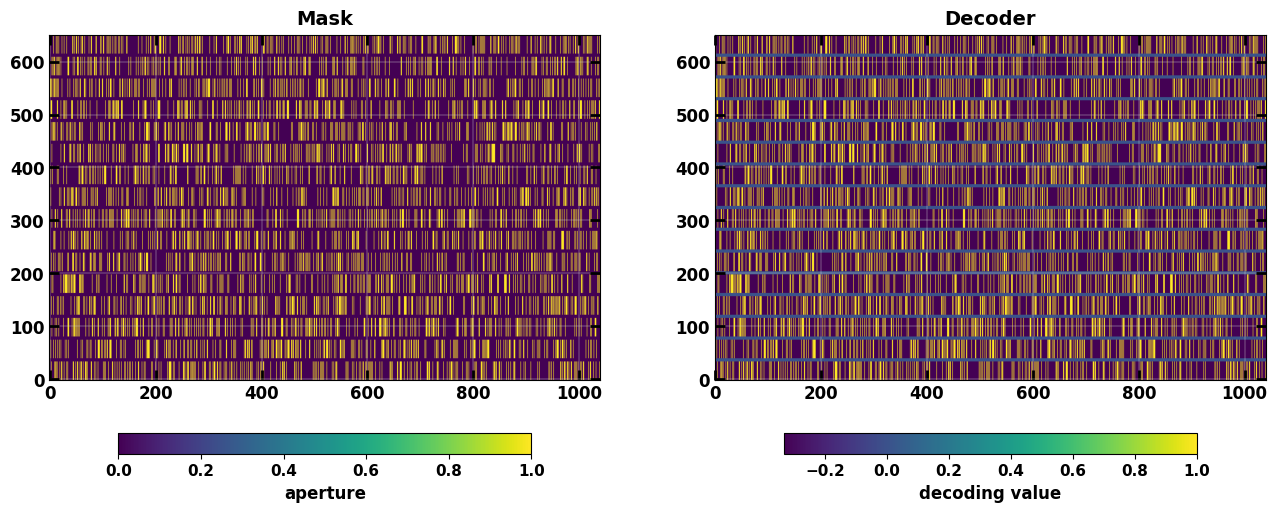

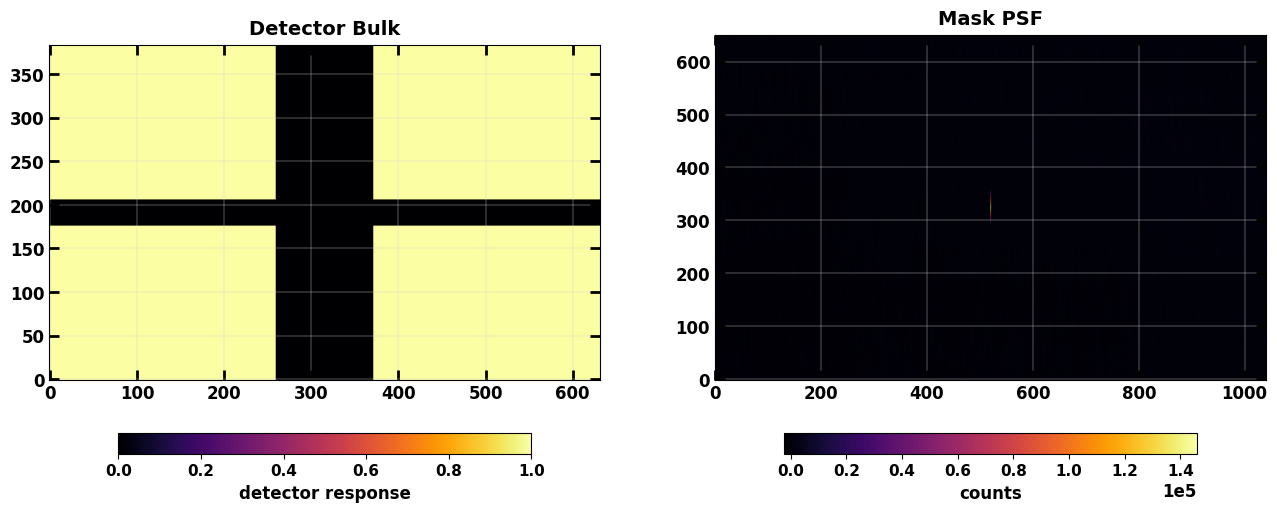

In [8]:
wfm = dm.import_mask(mask_fits_file, True, True)

**Simulating Sky**

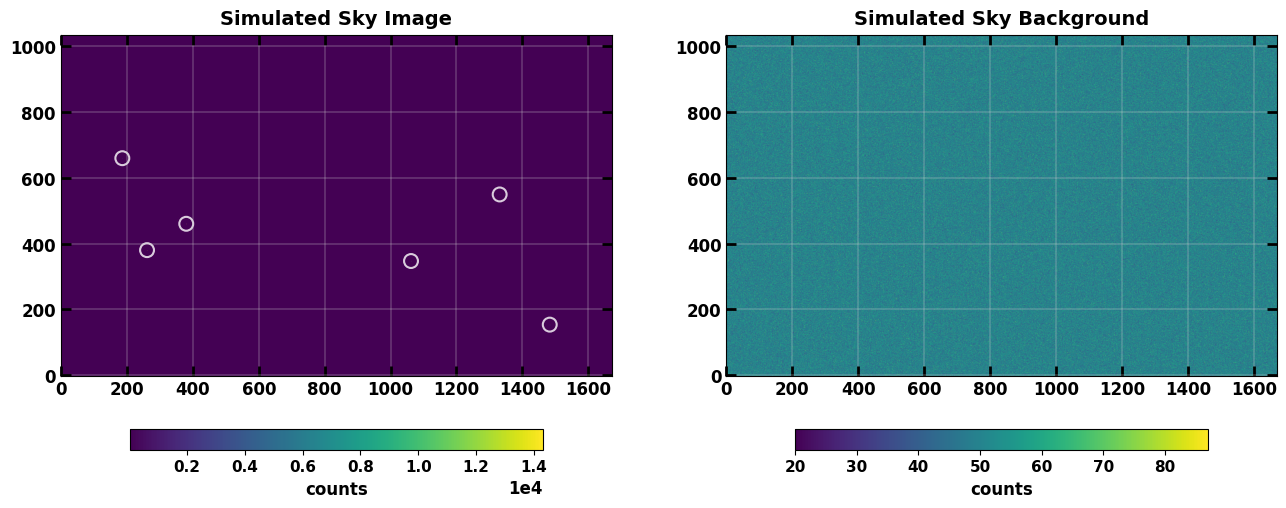

In [8]:
n_sources = 6
sources_flux = np.random.randint(int(5e3), int(2e4), size=n_sources)
sources_pos = None
sky_background_rate = int(5e1)

sky_image, sky_background, sources_pos = dm.sky_image_simulation(wfm.sky_shape, sources_flux, sources_pos, sky_background_rate)

dm.image_plot([sky_image, sky_background],
              ["Simulated Sky Image", "Simulated Sky Background"],
              cbarlabel=["counts", "counts"],
              cbarcmap=["viridis"]*2,
              simulated_sources=[sources_pos, None])


transmit = False
transmitted_photons = dm.transmitted_sky_image(sky_image, wfm) if transmit else sky_image

if transmit:
    dm.image_plot([transmitted_photons, dm.transmitted_sky_image(sky_background, wfm)],
                  ["Transmitted SkyImg", "Transmitted Sky BG"],
                  cbarlabel=["counts", "counts"],
                  cbarcmap=["viridis"]*2,
                  simulated_sources=[sources_pos, None])

show_sky = False
if show_sky:
    idx = 2
    crp = 50
    dm.image_plot([dm.crop(sky_image, sources_pos[idx], (crp, crp)), dm.crop(sky_background, sources_pos[idx], (crp, crp))],
                  [f"Cropped Source {idx}", f"Cropped Source {idx} - Sky BG"],
                  cbarlabel=["counts", "counts"],
                  cbarcmap=["viridis"]*2)

<br>

### **Test with real Detector**

**Sky Encoding and Sky Reconstruction**

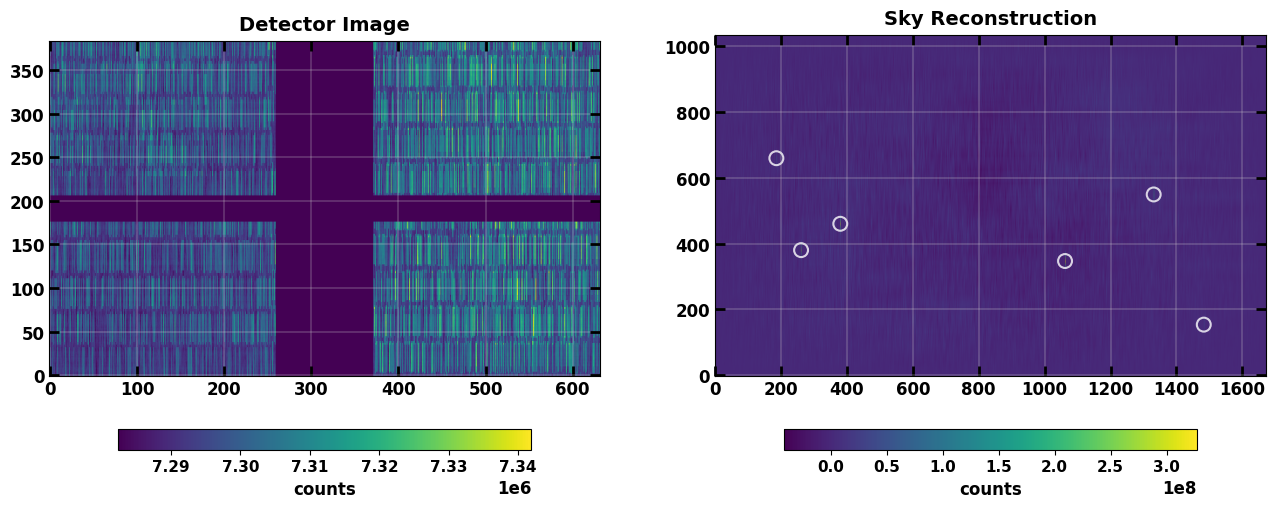

Simulated Source [0] transmitted counts: 13623 +/- 117
Reconstructed Source [0] counts: 6658 +/- 442533
Source [0] reconstructed counts wrt simulated: 48.88%

Simulated Source [1] transmitted counts: 9957 +/- 100
Reconstructed Source [1] counts: 8230 +/- 579760
Source [1] reconstructed counts wrt simulated: 82.66%

Simulated Source [2] transmitted counts: 9883 +/- 99
Reconstructed Source [2] counts: 1643 +/- 248432
Source [2] reconstructed counts wrt simulated: 16.63%

Simulated Source [3] transmitted counts: 9932 +/- 100
Reconstructed Source [3] counts: 5029 +/- 434445
Source [3] reconstructed counts wrt simulated: 50.63%

Simulated Source [4] transmitted counts: 14300 +/- 120
Reconstructed Source [4] counts: 7454 +/- 448495
Source [4] reconstructed counts wrt simulated: 52.13%

Simulated Source [5] transmitted counts: 6109 +/- 78
Reconstructed Source [5] counts: 2019 +/- 365478
Source [5] reconstructed counts wrt simulated: 33.05%



In [ ]:
detector = dm.sky_encoding(transmitted_photons, wfm)

skyrec, skyvar = dm.sky_reconstruction(detector, wfm)
norm_skyrec, norm_skyvar = dm.skyrec_norm(skyrec, skyvar, wfm)


dm.image_plot([detector, skyrec],
              ["Detector Image", "Sky Reconstruction"],
              cbarlabel=["counts", "counts"],
              cbarlimits=[(np.unique(detector)[1], None), (None, None)],
              cbarscinot=[True]*2,
              cbarcmap=["viridis"]*2,
              simulated_sources=[None, sources_pos])

dm.print_skyrec_info(transmitted_photons, norm_skyrec, norm_skyvar, sources_pos, False)

show_cropped_rec = False
if show_cropped_rec:
    idx = 2
    crp = 50
    dm.image_plot([dm.crop(skyrec, sources_pos[idx], (crp, crp)), dm.crop(wfm.balancing, sources_pos[idx], (crp, crp))],
                    [f"Cropped Reconstr. Source {idx}", f"Cropped Source {idx} - Balancing"],
                    cbarlabel=["counts", "counts"],
                    cbarcmap=["viridis"]*2)

show_slices = False
if show_slices:
    dm.enhance_skyrec_slices(skyrec, sources_pos)

**SNR**

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_28027/2486311858.py:6: SyntaxWarning: invalid escape sequence '\s'
  cbarlabel=["counts", "SNR[$\sigma$]"],


SNR Source [0] value: 598
SNR Source [1] value: 564
SNR Source [2] value: 263
SNR Source [3] value: 460
SNR Source [4] value: 660
SNR Source [5] value: 219


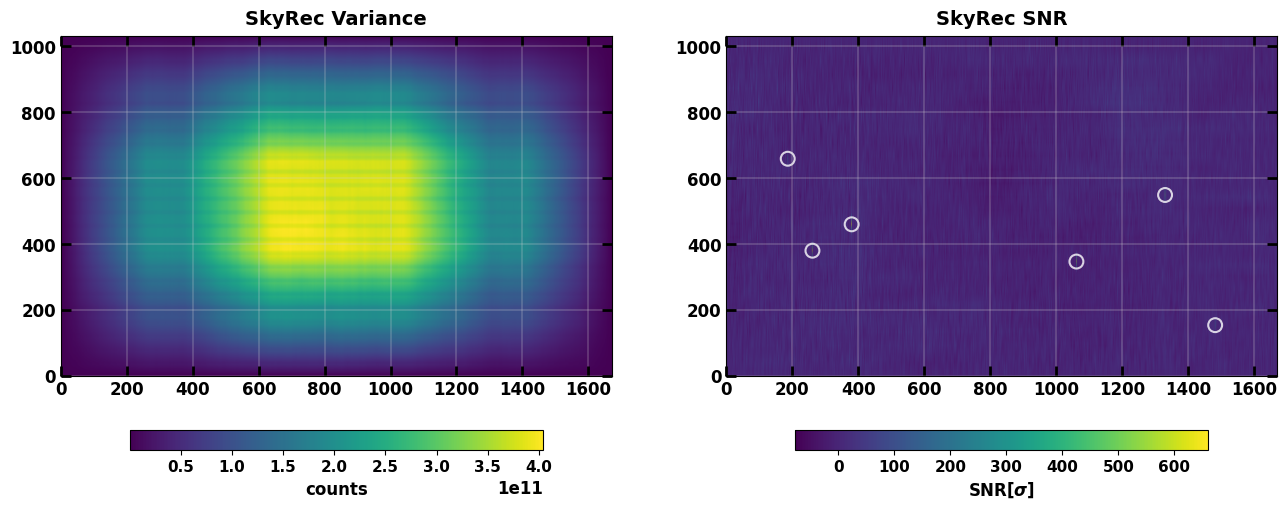

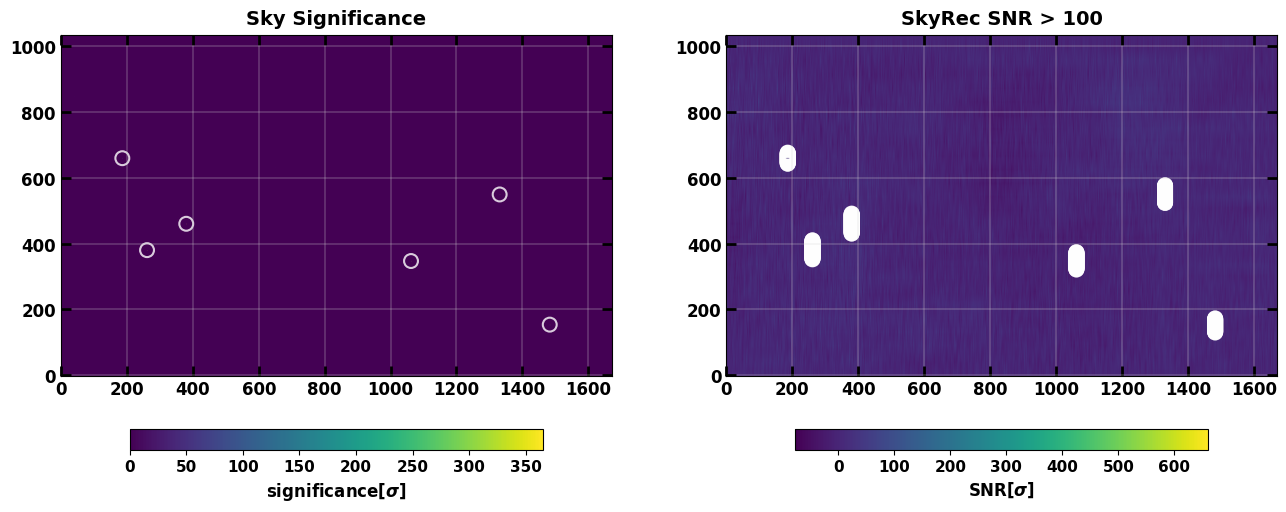

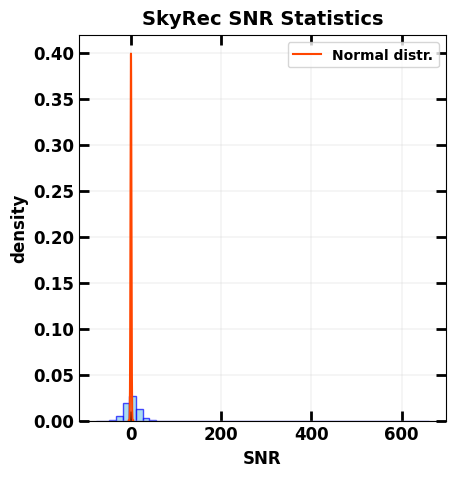

In [10]:
skysnr = dm.sky_snr(skyrec, skyvar)
dm.skyrec.print_snr_info(sky_image, skysnr, sources_pos, False)

dm.image_plot([skyvar, skysnr],
              ["SkyRec Variance", "SkyRec SNR"],
              cbarlabel=["counts", "SNR[$\sigma$]"],
              cbarlimits=[(None, None), (None, None)],
              cbarscinot=[True]*2,
              cbarcmap=["viridis"]*2,
              simulated_sources=[None, sources_pos])

thres_snr = 100
if thres_snr:
    sky_signif = dm.sky_significance(sky_image, sky_background_rate)
    dm.sky_snr_peaks(skysnr, thres_snr, sky_signif, sources_pos)


show_snr_distr = True
if show_snr_distr: dm.show_snr_distr(skysnr)

**Reconstruction Efficiency through the sky**

In [5]:
counts_map, snr_map = dm.skyrec.skyrec_efficiency(depth=10, cam=wfm, transmit=False)

Map resolution (px box dim): 172 x 167


100%|██████████| 9/9 [00:18<00:00,  2.06s/it]


<>:5: SyntaxWarning: invalid escape sequence '\{'
<>:5: SyntaxWarning: invalid escape sequence '\{'
/tmp/ipykernel_11757/1256792397.py:5: SyntaxWarning: invalid escape sequence '\{'
  cbarlabel=["rec. counts %", "SNR wrt max$\{$SNR$\}$ %"],


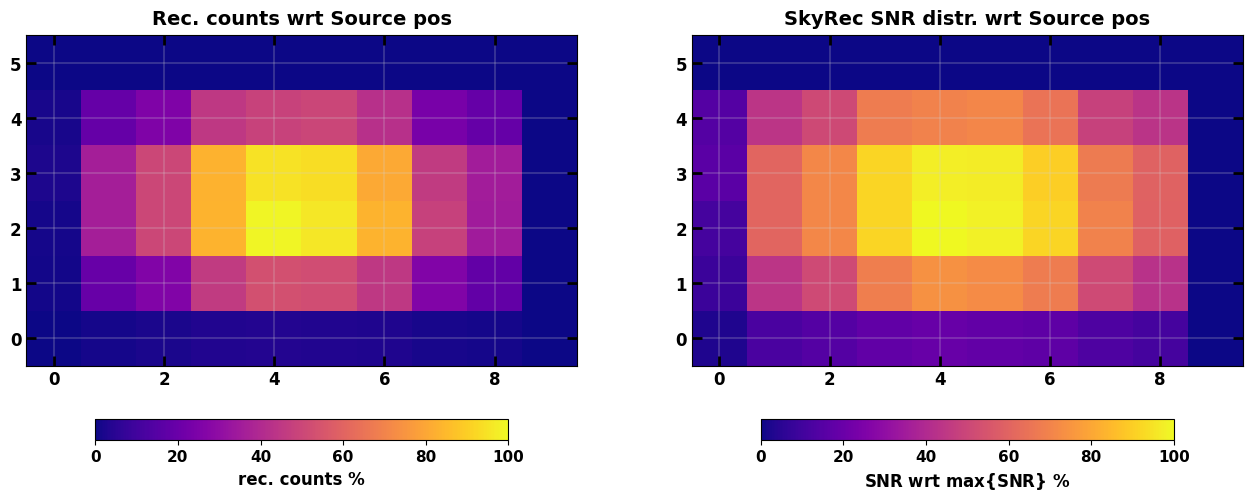

In [7]:
cbarlimits=[(0, 100), (0, 100)]

dm.image_plot([counts_map, snr_map*100/snr_map.max()],
                ["Rec. counts wrt Source pos", "SkyRec SNR distr. wrt Source pos"],
                cbarlabel=["rec. counts %", "SNR wrt max$\{$SNR$\}$ %"],
                cbarlimits=cbarlimits,
                cbarscinot=[True]*2,
                cbarcmap=["plasma"]*2)

In [6]:
from astropy.io import fits

#TODO:
#   1. create new .fits file
#   2. insert skyrec efficiency data
#   3. open mask .fits file 
#   4. copy header to skyrec efficiency .fits
#   5. close .fits

mask_fits_path = "/mnt/d/PhD_AASS/Coding/Images_fits/wfm_mask.fits"


with fits.open(mask_fits_path) as hdu_mask:
    hdu_mask.info()

Filename: /mnt/d/PhD_AASS/Coding/Images_fits/wfm_mask.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   ()      
  1  OR_MASK       1 BinTableHDU     36   676000R x 3C   [E, E, E]   
  2  MASK          1 BinTableHDU     36   676000R x 3C   [E, E, E]   
  3  RMATRIX       1 BinTableHDU     38   676000R x 3C   [E, E, E]   
  4  SENS          1 BinTableHDU     36   676000R x 3C   [E, E, E]   


In [ ]:
def skyrec_efficiency(depth: int,
                      mask_path: str,
                      save_to: str = None,
                      transmit: bool = False,
                      ) -> tuple[np.array, np.array]:
    
    # TODO: optimize: insert mean percentage/snr values for the whole box
    #      -> for now it only computes the rec. counts percentage and SNR on the grid intersections
    #      -> Problems: time consuming since each point of the sky will be reconstructed

    # TODO:
    #   - the fits should contain angular coord to represent the efficiency rec map based on the
    #     angle from the on-axis pos 

    # compute sky reconstruction efficiency and SNR wrt sky position
    cam = codedmask(mask_path)
    
    n, m = [np.linspace(10, s - 10, depth*s//max(cam.sky_shape), dtype=int) for s in cam.sky_shape]
    y, x = map(len, (n, m))
    counts_map, snr_map = np.zeros((y, x)), np.zeros((y, x))
    print(f"Map resolution (px box dim): {cam.sky_shape[0]//y} x {cam.sky_shape[1]//x}")

    for col in tqdm(range(x)):
        for row in range(y):

            sky_image, *_ = sky_image_simulation(cam.sky_shape, [1e5], [(n[row], m[col])], 1)
            transmitted_photons = sky_image*cam.specs['real_open_fraction'] if transmit else sky_image
            detector = sky_encoding(transmitted_photons, cam)

            skyrec, skyvar = sky_reconstruction(detector, cam)
            skysnr = sky_snr(skyrec, skyvar)
            skyrec, _ = skyrec_norm(skyrec, skyvar, cam)

            counts_map[row, col] = skyrec[*(n[row], m[col])]*100/transmitted_photons[*(n[row], m[col])]
            snr_map[row, col] = skysnr[*(n[row], m[col])]
    
    # save data as .fits file
    if save_to is not None:
        primary_header = fits.getheader(mask_path, ext=2)
        primary_header['EXTNAME'] = 'Primary'
        primary_hdu = fits.PrimaryHDU(header=primary_header)

        X = fits.Column(name='X', array=np.tile(np.arange(y), x), format='I', unit="px")
        Y = fits.Column(name='Y', array=np.repeat(np.arange(x), y), format='I', unit="px")

        rec_counts = fits.Column(name='REC_COUNTS_PERC', array=counts_map.flatten(order='F'), format='D', unit="%")
        skyrec_table_hdu = fits.BinTableHDU.from_columns([X, Y, rec_counts])
        skyrec_table_header = skyrec_table_hdu.header
        skyrec_table_header['EXTNAME'] = 'REC_EFFICIENCY'
        
        rec_snrs = fits.Column(name='SNR_PERC', array=snr_map.flatten(order='F'), format='D', unit="%")
        skysnr_table_hdu = fits.BinTableHDU.from_columns([X, Y, rec_snrs])
        skysnr_table_header = skysnr_table_hdu.header
        skysnr_table_header['EXTNAME'] = 'SNR_SKYREC'
        
        hdu_list = fits.HDUList([primary_hdu, skyrec_table_hdu, skysnr_table_hdu])
        hdu_list.writeto(save_to)
    
    return counts_map, snr_map

In [7]:
y, x = counts_map.shape
c1 = fits.Column(name='X [px]', array=np.tile(np.arange(y), x), format='I')
c2 = fits.Column(name='Y [px]', array=np.repeat(np.arange(x), y), format='I')
c3 = fits.Column(name='REC_COUNTS_PERC [%]', array=counts_map.flatten(order='F'), format='D')

primary_header = fits.getheader(mask_fits_path, ext=2)
primary_header['EXTNAME'] = 'Primary'
primary_hdu = fits.PrimaryHDU(header=primary_header)

table_hdu = fits.BinTableHDU.from_columns([c1, c2, c3])
table_header = table_hdu.header
table_header['EXTNAME'] = 'REC_EFFICIENCY'

hdu_list = fits.HDUList([primary_hdu, table_hdu])
hdu_list.writeto(root_path + "test_fits.fits")

In [ ]:
def skyrec_efficiency_output() -> fits:   ### for skyrec efficiency
    pass


def load_skyrec_pos_efficiency_array():

    def _adapt_to_sky():
        pass

    pass

In [ ]:
def counts_calibration(source_pos: tuple,
                       source_counts: float,
                       source_snr: float,
                       cam: object) -> tuple[float, float]:
    
    sky = np.zeros(cam.sky_shape)
    sky[*source_pos] = source_counts
    detector = sky_encoding(sky, cam)
    skyrec, skyvar = sky_reconstruction(detector, cam)
    skysnr = sky_snr(skyrec, skyvar)
    skyrec, _ = skyrec_norm(skyrec, skyvar, cam)

    perc_counts = skyrec[*source_pos]/source_counts
    perc_snr = skysnr[*source_pos]/source_snr

    return perc_counts, perc_snr


def fluence_calibration(source_pos: tuple,
                        cam: object) -> float:
        
    # This is better since is more representative than the calibration above,
    # however this should return a reconstruction effective area with physical dims.
    # This because we want a flux/cm^2 on the detector
    
    sky = np.zeros(cam.sky_shape)
    sky[*source_pos] = 1
    shifted_bulk = sky_encoding(sky, cam)

    sum_shifted_bulk, sum_bulk = shifted_bulk.sum(), cam.bulk.sum()

    return sum_shifted_bulk/sum_bulk

<br>

<br>

### **Test with full-plate Detector**

<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_27267/1390037821.py:36: SyntaxWarning: invalid escape sequence '\s'
  cbarlabel=["counts", "SNR[$\sigma$]"],


Simulated Source [0] transmitted counts: 16017 +/- 127
Reconstructed Source [0] counts: 5376 +/- 355600
Source [0] reconstructed counts wrt simulated: 33.56%

Simulated Source [1] transmitted counts: 7422 +/- 86
Reconstructed Source [1] counts: 3861 +/- 444751
Source [1] reconstructed counts wrt simulated: 52.02%

Simulated Source [2] transmitted counts: 12026 +/- 110
Reconstructed Source [2] counts: 7986 +/- 504380
Source [2] reconstructed counts wrt simulated: 66.41%

Simulated Source [3] transmitted counts: 16727 +/- 129
Reconstructed Source [3] counts: 1259 +/- 172107
Source [3] reconstructed counts wrt simulated: 7.52%

Simulated Source [4] transmitted counts: 12353 +/- 111
Reconstructed Source [4] counts: 10292 +/- 567770
Source [4] reconstructed counts wrt simulated: 83.32%

Simulated Source [5] transmitted counts: 9045 +/- 95
Reconstructed Source [5] counts: 813 +/- 175919
Source [5] reconstructed counts wrt simulated: 8.98%

SNR Source [0] value: 627
SNR Source [1] value: 374


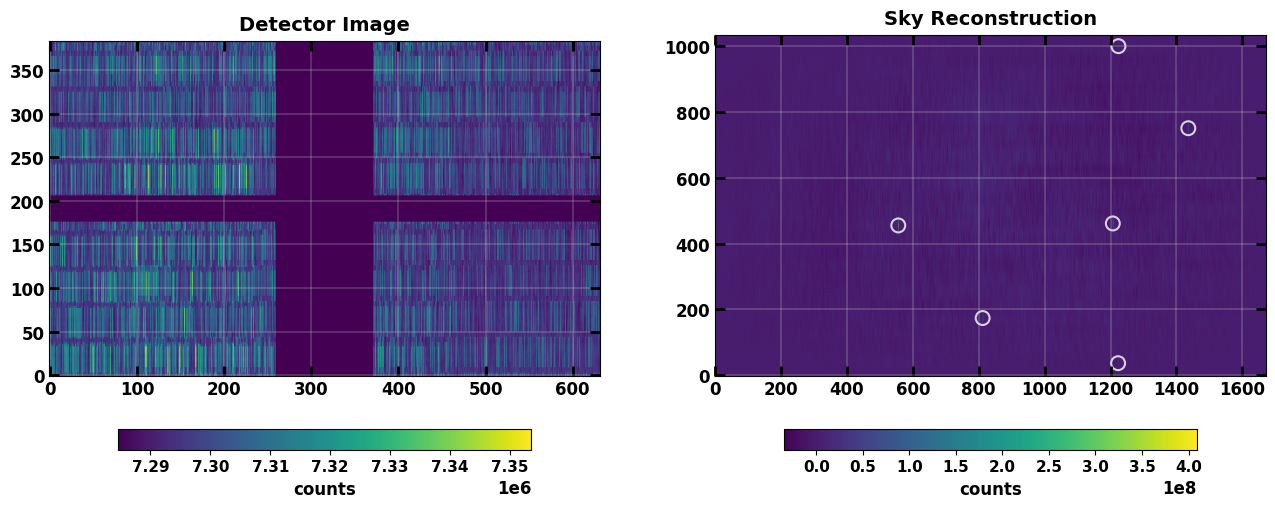

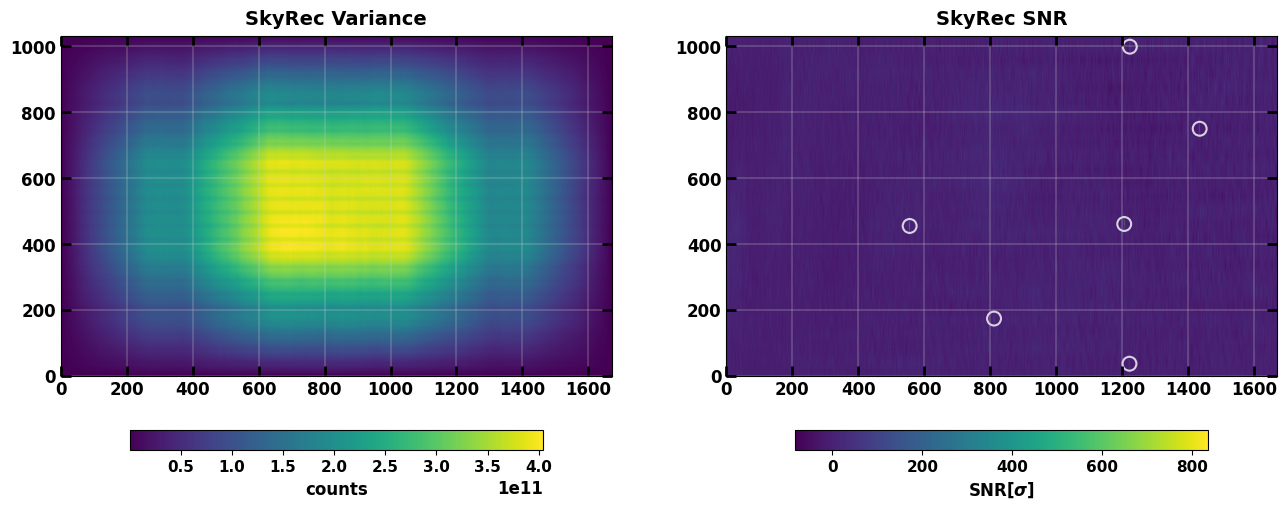

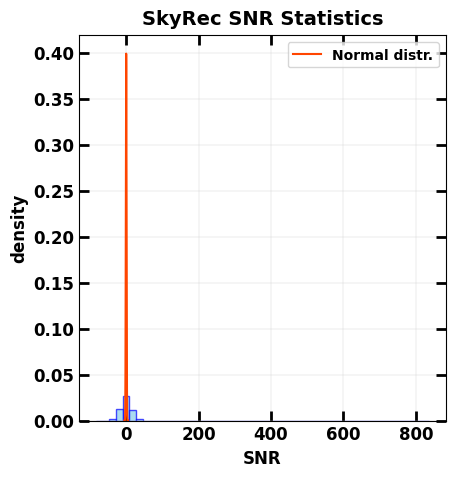

In [15]:
full_bulk = np.ones(wfm.detector_shape)
full_det = correlate(wfm.mask, sky_image, mode='valid')*full_bulk

fsum_det, fsum_bulk = full_det.sum(), full_bulk.sum()
bal = correlate(wfm.decoder, full_bulk)

sky = correlate(wfm.decoder, full_det)
full_skyrec = sky - bal*fsum_det/fsum_bulk

aperture = wfm.mask.sum()
det_eff_response = full_bulk.sum()/wfm.mask.size
norm = 1/(aperture*det_eff_response)
norm_fullskyrec = norm*full_skyrec

var = correlate(np.square(wfm.decoder), full_det)
full_skyvar = var + np.square(bal)*fsum_det/np.square(fsum_bulk) - 2*sky*bal/fsum_bulk
full_skyvar[full_skyvar <= 0] = np.inf
norm_fullskyvar = np.square(norm)*full_skyrec

skysnr = dm.sky_snr(full_skyrec, full_skyvar)


dm.print_skyrec_info(transmitted_photons, norm_skyrec, norm_fullskyvar, sources_pos, False)
dm.print_snr_info(sky_image, skysnr, sources_pos, False)


dm.image_plot([detector, skyrec],
              ["Detector Image", "Sky Reconstruction"],
              cbarlabel=["counts", "counts"],
              cbarlimits=[(np.unique(detector)[1], None), (None, None)],
              cbarscinot=[True]*2,
              cbarcmap=["viridis"]*2,
              simulated_sources=[None, sources_pos])

dm.image_plot([skyvar, skysnr],
              ["SkyRec Variance", "SkyRec SNR"],
              cbarlabel=["counts", "SNR[$\sigma$]"],
              cbarlimits=[(None, None), (None, None)],
              cbarscinot=[True]*2,
              cbarcmap=["viridis"]*2,
              simulated_sources=[None, sources_pos])

show_snr_distr = True
if show_snr_distr: dm.show_snr_distr(skysnr)

<br>

<br>

<br>

<br>

### **Reconstruction from Goldwurm (Evil Reconstruction)**

- Considering the formulae for the sky reconstruction and the variance from:
    1. A. Goldwurm and A. Gros, "Coded Mask Instruments for Gamma-Ray Astronomy", 2023

<br>

- In this formalism, the decoder is splitted in the $G^{+}$ and $G^{-}$ terms so that $G = G^{+} + G^{-}$, and the reconstructed sky is obtained consider again a bulk array $W$ and a balancing array $B$ that weights the contributes from the decoding pattern:

$$\hat{S} = {G^{+} \star (D\cdot W) - B \cdot [G^{-} \star (D\cdot W)] \over N}$$

<br>

$$Var(\hat{S}) = {(G^{+})^{2} \star (D\cdot W^{2}) + B^{2} \cdot [(G^{-})^{2} \star (D\cdot W^{2})] \over N^{2}}$$

- where:

    - $W$ is the bulk array or sensitive array, an array of weights for the detector response (values between 0 and 1)
    - $B$ is the balancing array $$B = {G^{+} \star W \over G^{-} \star W}$$
    - $N$ is a normalization array ($A$ being the mask) $$N = {(G^{+}\cdot A) \star W - B \cdot [(G^{-}\cdot A) \star W}]$$

- Here I will implement these two equations taking into account that:

    1. $D\cdot W \rightarrow D$
    2. $G^{+}\cdot A = G^{+}$ and $G^{-}\cdot A = 0$

- so that:
$$\hat{S} = {G^{+} \star D \over G^{+} \star W} - {G^{-} \star D \over G^{-} \star W}$$

<br>

$$Var(\hat{S}) = {(G^{+})^{2} \star (D\cdot W) \over (G^{+} \star W)^{2}} + {(G^{-})^{2} \star (D\cdot W) \over (G^{-} \star W)^{2}}$$

In [21]:
import warnings

def EvilSkyrec(detector: np.array,
               cam: object,
               ) -> tuple[np.array, np.array, np.array]:
    
    def _get_decoding_terms(decoder):
        G_plus = decoder.copy()
        G_plus[decoder < 0] = 0
        G_minus = decoder.copy()
        G_minus[decoder > 0] = 0
        assert np.all(G_plus + G_minus == decoder)
        return G_plus, G_minus
    
    def _cc(arr1, arr2):
        return correlate(arr1, arr2)
    
    def evilsnratio(sky, var):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            s = np.nan_to_num(sky/np.sqrt(var + 1e-8))
        return s
    
    G_plus, G_minus = _get_decoding_terms(cam.decoder)

    skyrec = _cc(G_plus, detector)/_cc(G_plus, cam.bulk) - _cc(G_minus, detector)/_cc(G_minus, cam.bulk)

    var1 = _cc(G_plus**2, detector*cam.bulk)/np.square(_cc(G_plus, cam.bulk))
    var2 = _cc(G_minus**2, detector*cam.bulk)/np.square(_cc(G_minus, cam.bulk))
    skyvar = var1 + var2

    skysnr = evilsnratio(skyrec, skyvar)

    return skyrec, skyvar/cam.mask.sum(), skysnr

In [ ]:
g_skyrec, g_skyvar, g_skysnr = EvilSkyrec(detector, wfm)

dm.skyrec.print_skyrec_info(sky_image, g_skyrec, g_skyvar, sources_pos)
dm.skyrec.print_snr_info(sky_image, g_skysnr, sources_pos)


dm.image_plot([detector, g_skyrec],
                ["Real Detector Image", "Sky Reconstruction"],
                cbarlabel=["counts", "counts"],
                cbarscinot=[True]*2,
                cbarcmap=["viridis"]*2,
                simulated_sources=[None, sources_pos])

idx = 2
crp = 50
dm.image_plot([dm.crop(g_skyrec, sources_pos[idx], (crp, crp))],
                [f"Cropped Reconstr. Source {idx}"],
                cbarlabel=["counts"],
                cbarcmap=["viridis"])


dm.image_plot([g_skyvar, g_skysnr],
                ["SkyRec Variance", "SkyRec SNR"],
                cbarlabel=["counts", "SNR[$\sigma$]"],
                cbarlimits=[(None, None), (None, None)],
                cbarscinot=[True]*2,
                cbarcmap=["viridis"]*2,
                simulated_sources=[None, sources_pos])

thres_snr = 30
loc = np.argwhere(g_skysnr > thres_snr).T

dm.image_plot([dm.sky_significance(sky_image, sky_background_rate), g_skysnr],
                ["Sky Significance", f"SkyRec SNR > {thres_snr}"],
                cbarlabel=["significance[$\sigma$]", "SNR[$\sigma$]"],
                cbarlimits=[(None, None), (None, None)],
                cbarscinot=[True]*2,
                cbarcmap=["viridis"]*2,
                simulated_sources=[sources_pos, np.dstack((loc[0], loc[1]))[0]])

- I'm happy to see that does not work

- In the case of URA/MURA masks should be fine though